In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
data= pd.read_csv('diabetes_with_names.csv')

In [38]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


# EDA

In [39]:
#CHECKING FOR MISSING VALUES
data.isna().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [40]:
df = data.fillna(method='bfill')

C:\Users\Dell\AppData\Local\Temp\ipykernel_6272\4059266483.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = data.fillna(method='bfill')


In [41]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.863281,3.378482,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.533854,15.950016,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.998828,7.879161,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.242188,11.760038,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [44]:
df.dtypes

Pregnancies                 float64
Glucose                       int64
BloodPressure                 int64
SkinThickness               float64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [45]:
df.shape

(768, 9)

In [47]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='Outcome', ylabel='count'>

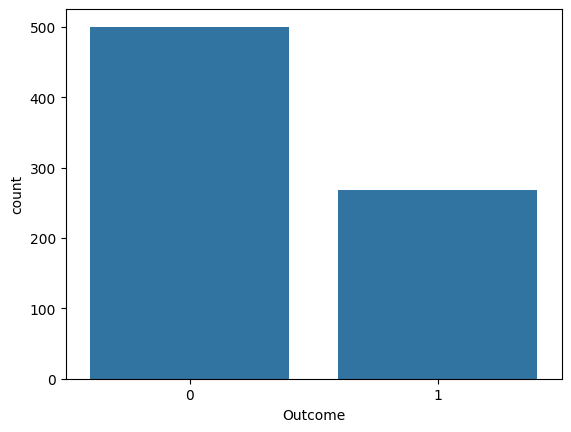

In [48]:
sns.countplot(df,x='Outcome')

<Axes: >

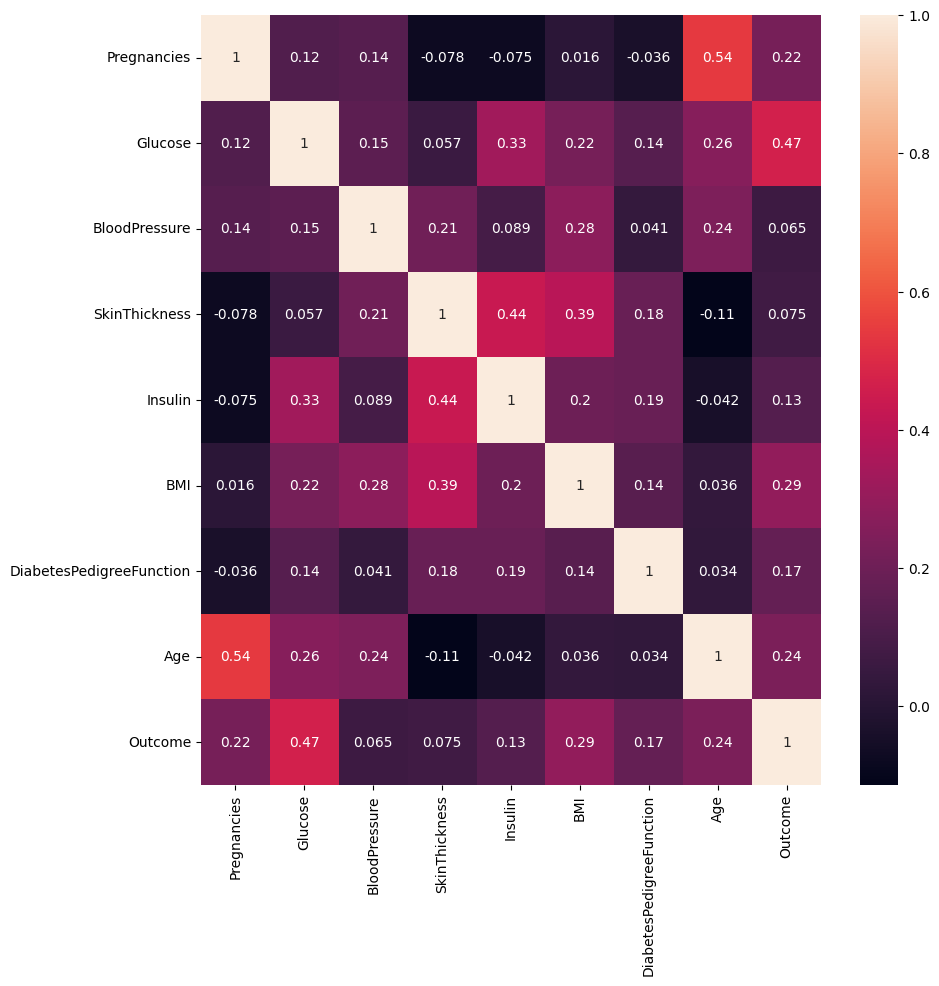

In [49]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Axes: >

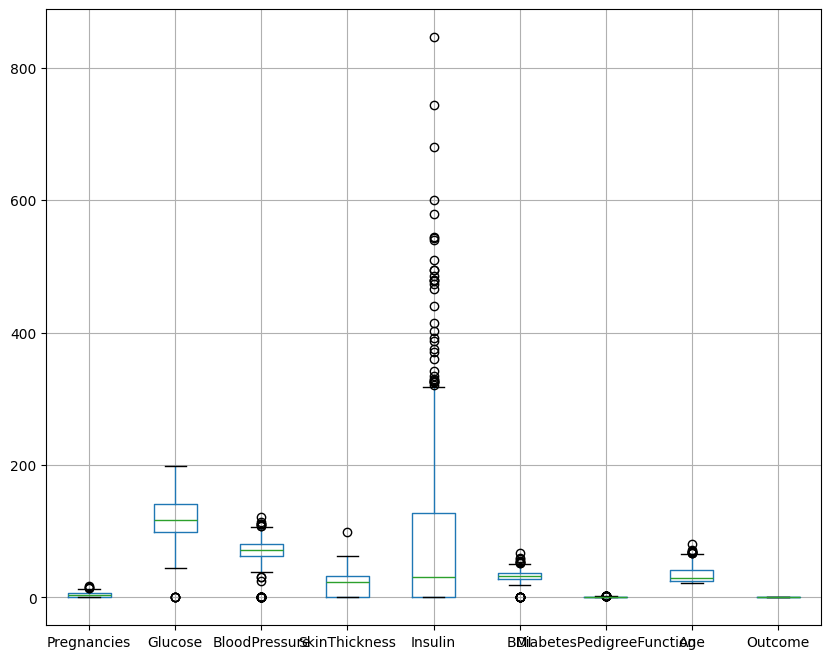

In [50]:
df.boxplot(figsize=(10,8))

# Assign x and y

In [51]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)



X shape:	 (768, 8)

Y shape:	 (768, 1)


Spliting the data between test and training

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

Build NB - Gaussian Model

In [53]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
#train
gauss_nb.fit(xtrain,ytrain)
print()
#testing
ypred_gauss=gauss_nb.predict(xtest)
print('Predicted value is : \t',ypred_gauss)
print()
print('Testing completed')
print('='*75)
#performance Measure
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_gauss=accuracy_score(ytest,ypred_gauss)
print('*'*15 + 'Performance Measures on Gaussian Navie Bayes' + '*'*16)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_gauss))
print()
print('='*75)


Predicted value is : 	 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0]

Testing completed
***************Performance Measures on Gaussian Navie Bayes****************
Accuracy score:	
 0.7597402597402597


Confusion matrix:	
 [[93 16]
 [21 24]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       109
           1       0.60      0.53      0.56        45

    accuracy                           0.76       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.75      0.76      0.76       154




C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB

In [54]:
from sklearn.naive_bayes import MultinomialNB
mul_nb = MultinomialNB()
mul_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_mul_nb = mul_nb.predict(xtest)
print('Predicted value is: \t',ypred_mul_nb)
print()
print('Testing completed')
print('='*75)
#Performance Measure
accuracy_mul_nb=accuracy_score(ytest,ypred_mul_nb)
print('*'*14 + 'Performance Measures on Multinomial Navie Bayes' + '*'*14)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_mul_nb))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_mul_nb))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_mul_nb))
print()
print('='*75)

Training Completed

Predicted value is: 	 [0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0]

Testing completed
**************Performance Measures on Multinomial Navie Bayes**************
Accuracy score:	
 0.5584415584415584


Confusion matrix:	
 [[71 38]
 [30 15]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.70      0.65      0.68       109
           1       0.28      0.33      0.31        45

    accuracy                           0.56       154
   macro avg       0.49      0.49      0.49       154
weighted avg       0.58      0.56      0.57       154




C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Build NB - Bernoulli Model


In [55]:
from sklearn.naive_bayes import BernoulliNB
ber_nb = BernoulliNB()
ber_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_ber_nb = ber_nb.predict(xtest)
print('Predicted value is: \t',ypred_ber_nb)
print()
print('Testing completed')
print('='*75)
#Performace Measure
accuracy_ber_nb=accuracy_score(ytest,ypred_ber_nb)
print('*'*15 + 'Performance Measures on Bernoulli Navie Bayes' + '*'*15)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_ber_nb))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_ber_nb))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_ber_nb))
print()
print('='*75)


Training Completed

Predicted value is: 	 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]

Testing completed
***************Performance Measures on Bernoulli Navie Bayes***************
Accuracy score:	
 0.7077922077922078


Confusion matrix:	
 [[109   0]
 [ 45   0]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       109
           1       0.00      0.00      0.00        45

    accuracy                           0.71       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.50      0.71      0.59       154




C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: 

In [56]:
print(gauss_nb,'=',accuracy_gauss)
print(mul_nb,'=',accuracy_mul_nb)
print(ber_nb,'=',accuracy_ber_nb)

GaussianNB() = 0.7597402597402597
MultinomialNB() = 0.5584415584415584
BernoulliNB() = 0.7077922077922078


In [57]:
x.shape


(768, 8)

# Ensemble Model
1. Bagging Classifier

In [58]:
#Baggingclassifier
from sklearn.ensemble import BaggingClassifier
bagc=BaggingClassifier(base_estimator=gauss_nb,n_estimators=5,random_state=2)
bagc.fit(xtrain,ytrain) #train model
ypred_bagc=bagc.predict(xtest)
print("*"*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_bagc))
print('-'*100)
accuracy_bagc=accuracy_score(ytest,ypred_bagc)
print('Accuracy Score:\t',accuracy_bagc)
print('-'*100)
print('Classification Report',classification_report(ytest,ypred_bagc))
print('='*100)

****************************************************************************************************
Confusion Matrix:
 [[91 18]
 [21 24]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.7467532467532467
----------------------------------------------------------------------------------------------------
Classification Report               precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.57      0.53      0.55        45

    accuracy                           0.75       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


2. RandomForestClassifier model

In [30]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(n_estimators=5,random_state=1)
rand_for.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand=rand_for.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand))
print('-'*100)
accuracy_rand=accuracy_score(ytest,ypred_rand)
print('Accuracy Score:\t',accuracy_rand)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand))
print('='*100)

****************************************************************************************************
Confusion Matrix:
 [[105   0]
 [  0 100]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 1.0
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       100

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [60]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for_1=RandomForestClassifier(n_estimators=10,random_state=1,max_depth=5)
rand_for_1.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand_1=rand_for_1.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand_1))
print('-'*100)
accuracy_rand_1=accuracy_score(ytest,ypred_rand_1)
print('Accuracy Score:\t',accuracy_rand_1)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand_1))
print('='*100)

****************************************************************************************************
Confusion Matrix:
 [[96 13]
 [20 25]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.7857142857142857
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       109
           1       0.66      0.56      0.60        45

    accuracy                           0.79       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


3. ExtraTrees model

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree=ExtraTreesClassifier(n_estimators=10,bootstrap=True,verbose=2)
extra_tree.fit(xtrain,ytrain)#train the model
#test the model
ypred_extra=extra_tree.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_extra))
print('-'*100)
accuracy_extra=accuracy_score(ytest,ypred_extra)
print('Accuracy Score:\t',accuracy_extra)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_extra))
print('='*100)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
****************************************************************************************************
Confusion Matrix:
 [[96 13]
 [24 21]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.7597402597402597
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       109
           1       0.62      0.47      0.53        45

    accuracy                           0.76       154
   macro avg       0.71      0.67      0.69       154
weighted avg       0.75      0.76      0.75       154



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model with Accuracy scores

In [65]:
scores=[('Gaussian_NB',accuracy_gauss),
 ('Multinomial_NB',accuracy_mul_nb),
 ('Bernoulli_NB',accuracy_ber_nb),
 ('Bagging_classifier',accuracy_bagc),
 ('RandomForest Classifier',accuracy_rand),
 ('RandomForest Classifier with pruning',accuracy_rand_1),
 ('ExtraTrees Classifier',accuracy_extra)
 
 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                                  Model  Accuracy_score
4               RandomForest Classifier        1.000000
5  RandomForest Classifier with pruning        0.785714
0                           Gaussian_NB        0.759740
6                 ExtraTrees Classifier        0.759740
3                    Bagging_classifier        0.746753
2                          Bernoulli_NB        0.707792
1                        Multinomial_NB        0.558442


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial_NB'),
  Text(2, 0, 'Bernoulli_NB'),
  Text(3, 0, 'Bagging_classifier'),
  Text(4, 0, 'RandomForest Classifier'),
  Text(5, 0, 'RandomForest Classifier with pruning'),
  Text(6, 0, 'ExtraTrees Classifier')])

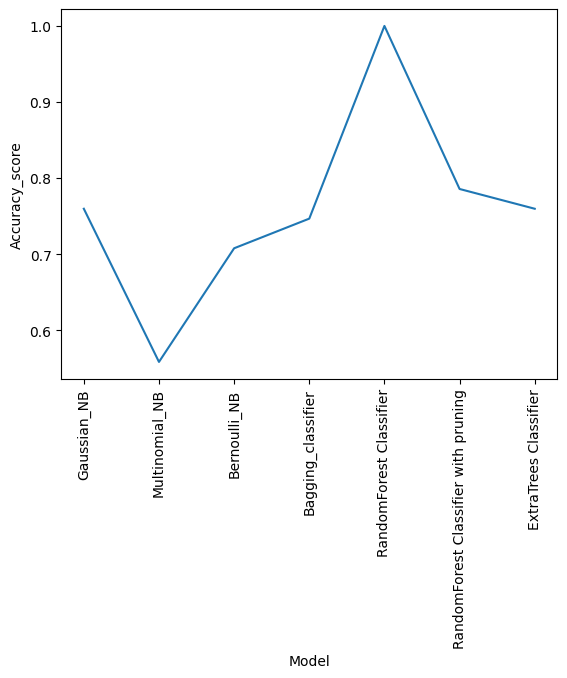

In [67]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)